## REI602M Machine Learning - Homework 8 (**UNDER CONSTRUCTION!!!**)
### Due: *Monday* 11.3.2019

**Objectives**: Topic discovery with NMF, Image compression with PCA and NMF, Spectral clustering

**Name**: Emil Gauti Friðriksson, **email: ** egf3@hi.is, **collaborators:** (if any)

1\. [*Topic discovery with NMF*, 40 points]. Here you will use non-negative matrix factorization (NMF) to analyze the content of tweets from Donald Trump. In particular, you will attempt to discover the main topics of his tweets by applying NMF to a document-term matrix derived from the tweets (or rather to a "tweet-term" matrix).

The NMF approximates a non-negative $n \times p$ matrix $X$ of rank $r$ with a rank $k \leq r$ matrix such that

$$
X \approx WH
$$

where $W$ is a $n \times k$ matrix with $W_{ij} \geq 0$ and $H$ is a $k \times p$ matrix with $H_{ij} \geq 0$. Provided that $k$ is appropriately chosen, the *weight matrix* $W$ and *coefficient matrix* $H$ can reveal interesting structures in the data. Column $j$ of $X$ is approximated with (see comment 1 below)

$$
X_{:,j} \approx (WH)_{:,j} = H_{1j}W_{:,1} + H_{2j}W_{:,2} + \ldots + H_{kj}W_{:,k}
$$

where the subscript $:,j$ denotes column $j$. The columns of $W$ in this context correspond to the main topics of Trump's tweets and column $j$ of $H$ contains information on how the topics are "mixed" together to form (approximately) column $j$ of $X$.

a) Download all tweets by Trump from http://www.trumptwitterarchive.com/archive from the period 20.1.2017 (inauguration day) to present, omitting retweets, as a CSV file (approx. 5800 tweets). Create a tweet-term matrix using word counts (see below). For a given value of $k$, perform NMF on the matrix and list the words corresponding to the largest $H_{ij}$ values for columns $j=1,\ldots,k$. You need to experiment with different values of $k$ (a.k.a. the *Trump-dimension*) to get interesting topic groupings. If $k$ is too low different topics will be mixed together, when $k$ gets large, the same subject will appear in multiple clusters. Report your results (c.a. 20 words on each topic) for the value of $k$ that you end up picking.

b) Select two topics of "interest" (e.g. Trump's nemesis Hillary Clinton). Identify the corresponding columns in $W$ and list approx. 5 tweets using the largest $W$-values as indices. Does the content of the tweets match the selected topics?

*Comments*:

1) The $n \times k$ matrix-vector product $y=Ax$ can be interpreted as a weighted sum of the columns of $A$,
$$
y=
\begin{array}{ccc}
~\mid &  & ~\mid \\
x_1 a_1 & + \ldots + & x_k a_k \\
~\mid & & ~\mid \\
\end{array}
$$
and matrix multiplication can be considered as multiple matrix-vector products.

2) Use the NMF implementation in`from sklearn.decomposition.NMF`. You can use the Wikipedia data set from HW7 to test your NMF-based topic discovery code. Once you get convincing results, apply your code to the newly constructed tweet-term matrix.

3) Use `sklearn.feature_extraction.text.CountVectorizer` to create the document-term matrix based on word counts from the raw tweets. This function performs tokenization, counting and normalization and removes stop words. Use the following parameter values `max_features=k`, `max_df=0.95` (remove words that occur in at least 95% of the documents), `min_df=2` (remove words that occur in fewer than two documents), `stop_words='english'`.

4) Use `CountVectorizer.get_feature_names()` to get the list of words that were retained. Sidenote: Rare words are downplayed by the term-frequency encoding used here but they are often found to be informative. Therefore people often encode the text using term-frequency-inverse document frequency.

5) Scikit's NMF function obtaines the factorization $X \approx WH$ by minimizing the objective function $0.5||X - WH||_F^2$ (here $||A||_F$ denotes the Frobenius norm of a matrix $A$, $||A||_F = \sqrt{\sum_{i=1}^n \sum_{j=1}^n A_{ij}^2}$. The NMF implementation provides means to regularize the solution via parameters `alpha` and `l1_ratio`. You may want to experiment with these parameters to see if you can improve the list of topics.

6) The $H$ matrix is stored in `nmf.components_`

7) The NMF is described briefly in section 14.6 of ESL. A more detailed account can be found in the original article
http://www.columbia.edu/~jwp2128/Teaching/E4903/papers/nmf_nature.pdf

In [2]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
def print_top_words(nmf,feature_names, n_top_words):
    for nr, topic in enumerate(nmf.components_,1):
        top_words_indx = topic.argsort()[:-n_top_words - 1:-1]
        ordd = ''
        for i in range(n_top_words):
            if i%11==0:
                ordd += '\n'
            ordd += feature_names[top_words_indx[i]]+' '
        print('flokkur nr', nr, ':', ordd,'\n')


data = np.genfromtxt('trump_tweets.CSV',encoding="utf-8", delimiter=',',dtype=str,skip_header=1)
k=10

vectorizer = CountVectorizer(max_df=0.95,min_df=2, stop_words='english')
X = vectorizer.fit_transform(data)#þessi gæji heldur utan um hve oft orðin koma fyrir

nmf = NMF(n_components=k,init='random', random_state=0,alpha=.1, l1_ratio=.5).fit(X)


feature_names = vectorizer.get_feature_names()


print_top_words(nmf, feature_names, 20)

flokkur nr 1 : 
amp military repeal replace strong loves taxes women years borders vets 
going nation said work hard getting healthcare dems economy  

flokkur nr 2 : 
people country american want way years enemy come like coming going 
millions time working million laws let history know bad  

flokkur nr 3 : 
news fake media cnn just story don stories bad reporting new 
said dishonest enemy nbc good house like report time  

flokkur nr 4 : 
border wall security democrats want country crime don southern immigration stop 
need military drugs republicans laws dems mexico national open  

flokkur nr 5 : 
fbi collusion witch hunt hillary democrats russia clinton crooked campaign comey 
just russian mueller rigged election angry hoax dossier investigation  

flokkur nr 6 : 
president trump obama donald thank election campaign just administration did xi 
said russia american foxandfriends right day years china isis  

flokkur nr 7 : 
trade korea united china north states just deal good count

**(b)**
Ég vel flokkana sem mér sýnist tengjast **Border Wall**(flokkur nr. 4) og **Fake News**(flokkur nr. 3)

In [3]:
W = nmf.transform(X)
bw_fn = [2,3]
n_tweets = 5
for ind in bw_fn:
    weight = W[:,ind]
    top_tweets = np.argsort(weight)[::-1]
    print('flokkur', ind+1)
    print('-'*50)
    for i in range(n_tweets):
        print('tweet',i+1,':',data[top_tweets[i]],'\n')

flokkur 3
--------------------------------------------------
tweet 1 : Google search results for “Trump News” shows only the viewing/reporting of Fake News Media. In other words they have it RIGGED for me &amp; others so that almost all stories &amp; news is BAD. Fake CNN is prominent. Republican/Conservative &amp; Fair Media is shut out. Illegal? 96% of.... 

tweet 2 : CNN and others in the Fake News Business keep purposely and inaccurately reporting that I said the “Media is the Enemy of the People.” Wrong! I said that the “Fake News (Media) is the Enemy of the People” a very big difference. When you give out false information - not good! 

tweet 3 : Google search results for “Trump News” shows only the viewing/reporting of Fake New Media. In other words they have it RIGGED for me &amp; others so that almost all stories &amp; news is BAD. Fake CNN is prominent. Republican/Conservative &amp; Fair Media  is shut out. Illegal?  96% of... 

tweet 4 : The Fake News refuses to talk about h

2\. [*Image compresssion with PCA and NMF*, 30 points] Fit a non-negative matrix factorization model to the zero-digits in the subset of the MNIST database from the Jupyter workbook `v07_pca_tsne_kmeans` (download from Piazza). Perform the following using 25 basis elements in the factorization:

i) Display the $W$ matrix as an image (see Fig. 14.33 in ESL) as well as an image for the part of $H$ that corresponds to the first image in the data set.

ii)  Compare a reconstruction of the first image in the data set with the original image. What compression ratio is achieved with 25 basis elements?

b) Repeat the analysis in a using 24-component (plus mean) PCA model (see Fig. 14.33 in ESL). Compare briefly with the results in a)

*Comments*:

1) Use the NMF implementation in `sklearn.decomposition.NMF`. The *columns* of the input matrix should contain the pixel values for each image (this is opposed to how we treated image data earlier). The `fit_transform` function returns the $W$ matrix and the attribute `components_` contains the $H$ matrix.

2) When reconstructing images you may need to "clip" the data, i.e. set pixel values above 1.0 to 1.

3) Many elements of the $W$ matrix will be zero and when you use a gray-scale color map, these elements will show up as black. You might therefore want to represent positive values with black and zeros with white.

4) Use scikit to perform PCA.

**(a-i)**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset (small subset)
data = np.loadtxt("data/mnist2500_X.txt")
labels = np.loadtxt("data/mnist2500_labels.txt")
X = data[np.where(labels==0)]

In [5]:
from sklearn.decomposition import NMF
k=25
nmf = NMF(n_components=k,init='random', random_state=0,alpha=.1, l1_ratio=.5).fit(X)
W = nmf.transform(X)
H = nmf.components_

[[1.58170883 0.2199161  0.07983504 0.58530211 0.35511231]
 [0.         0.7145099  0.49439607 0.29901622 0.        ]
 [0.         0.         0.2730148  0.12046098 0.39268645]
 [0.27173823 0.16445356 0.         0.44348868 0.34076575]
 [0.         0.         0.         0.33121117 0.38133959]]


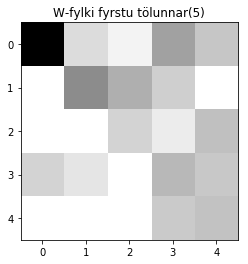

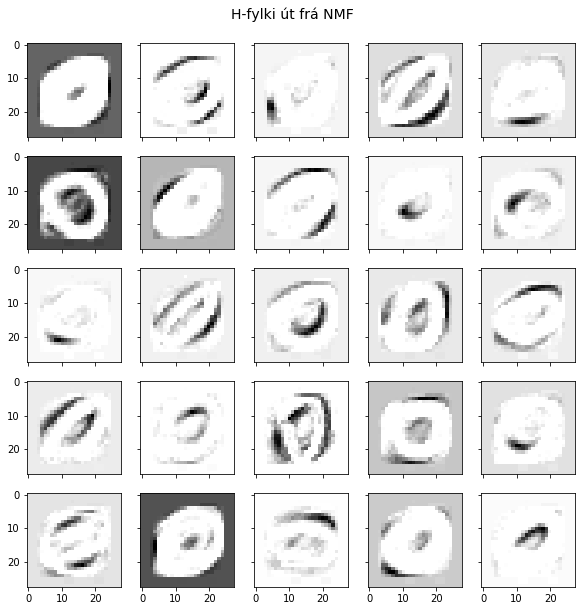

In [6]:
#Prentum út og teiknum W-fylkið sem sýnir hvernig fyrsta myndin er uppröðuð
print(W[0,:].reshape(5,5))
plt.imshow(W[0,:].reshape(5,5),interpolation='none',cmap='gray_r')
plt.title('W-fylki fyrstu tölunnar(5)')

#Prentum út H-fylkið
fig, ax = plt.subplots(5, 5, sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.2, wspace=0.1)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle('H-fylki út frá NMF',fontsize=14, y=0.93)
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(H[j+5*i].reshape(28,28),
                        interpolation='none',cmap='gray_r')

plt.show()

**(a-ii)**

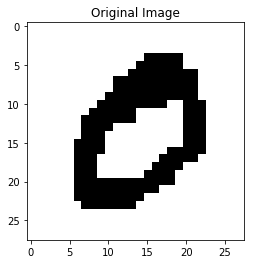

Text(0.5,1,'Reconstructed image')

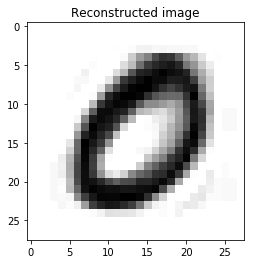

In [7]:
#Original image
mynd1 = X[0,:]
mynd1 = np.reshape(mynd1,(28,28))
plt.imshow(mynd1.T,interpolation='none',cmap='gray')
plt.title('Original Image')
plt.show()

#Reconstructed image
mynd2=np.zeros((1,784))       
for i in range(784):
    mynd2[0,i] = np.minimum(1,W[0,:]@H[:,i])
mynd2 = np.reshape(mynd2,(28,28))
plt.imshow(mynd2.T,interpolation='none',cmap='gray')
plt.title('Reconstructed image')



In [8]:
print("%d bytes" % (X.nbytes))
print("%d bytes" % (H.nbytes))
print("%d bytes" % (W.nbytes))

compr_ratio = (H.nbytes + W.nbytes)/X.nbytes
print('Compression ratio:', compr_ratio)

1467648 bytes
156800 bytes
46800 bytes
Compression ratio: 0.13872536193964766


To store all these pictures in compressed format it only requires the $H$ matrix and 2500 small $5\times 5$ matrices stored within $W$. This takes a lot less storage than storing 2500 $28\times 28$ images. As we can see from the memory sizes of the arrays, the compression ratio $\frac{M_{compressed}}{M_{original}} \approx 0.139 $ where $M_{compressed}$ is the memory required to store both $W$ and $H$ and $M_{original}$ is the memory required to store all the 2500 pictures

**(b-i)**

In [9]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data/mnist2500_X.txt")
labels = np.loadtxt("data/mnist2500_labels.txt")
X = data[np.where(labels==0)]

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=24)
pca.fit(X)
W_pc = np.column_stack((np.mean(X, axis = 1), pca.transform(X)))
H_pc = np.row_stack((np.mean(X, axis = 0), pca.components_))

print(W_pc.shape)
print(H_pc.shape)

(234, 25)
(25, 784)


[[ 0.7755102  -1.76802994 -1.27979795 -0.98247169 -1.49648082]
 [-0.59742492  0.0951725  -0.15717774 -1.82373016 -1.18108201]
 [-0.79131655 -0.98551655 -1.85091658  0.57807399 -0.46465806]
 [-0.5491774  -0.96077809 -0.47312769 -0.55195909  0.49654213]
 [ 1.02903454  0.22100741  1.4620799   0.14287072 -0.03689097]]


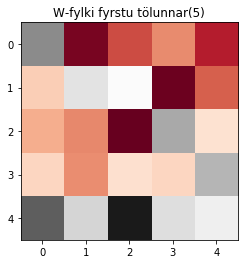

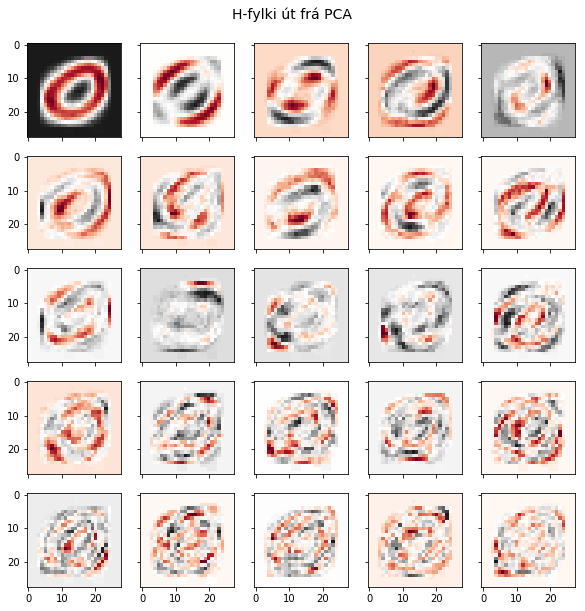

In [11]:
print(W_pc[0,:].reshape(5,5))
plt.imshow(W_pc[0,:].reshape(5,5),interpolation='none',cmap='RdGy')
plt.title('W-fylki fyrstu tölunnar(5)')
#Prentum út H-fylkið
fig, ax = plt.subplots(5, 5, sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.2, wspace=0.1)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle('H-fylki út frá PCA',fontsize=14, y=0.93)
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(H_pc[j+5*i].reshape(28,28),
                        interpolation='none',cmap='RdGy')

plt.show()

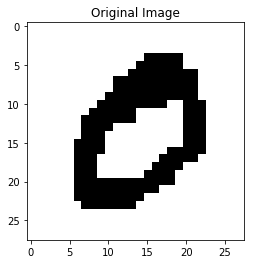

Text(0.5,1,'Reconstructed image')

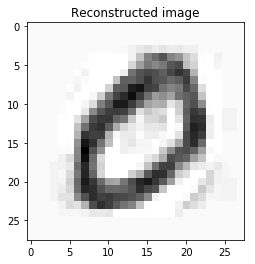

In [12]:
#Original image
mynd1b = X[0,:]
mynd1b = np.reshape(mynd1b,(28,28))
plt.imshow(mynd1b.T,interpolation='none',cmap='gray')
plt.title('Original Image')
plt.show()

#Reconstructed image
mynd2b=np.zeros((1,784))       
for i in range(784):
    mynd2b[0,i] = np.minimum(0.8,W_pc[0,:]@H_pc[:,i])
mynd2b = np.reshape(mynd2b,(28,28))
plt.imshow(mynd2b.T,interpolation='none',cmap='gray')
plt.title('Reconstructed image')

Við fáum í báðum tilvikum (**a** og **b**) góðar niðurstöður. Það er áhugavert að sjá hvernig $H$ og $W$ fylkin eru uppbyggð og hve mikið þau eru frábrugðin hver öðrum í lið **b** miðað við lið **a**. Út frá mynd af $H$ í PCA má sjá að stökin í $H$ eru ekki jafn látlaus og í NMF.

3\. [*Spectral clustering*, 30 points] In spectral clustering the clustering problem is transformed to a graph partitioning problem. The input data $\mathbb{X}=\{x^{(1)},\ldots,x^{(n)} \}$ is used to construct a *similarity graph* of pair-wise similarities between data points. The graph is then partitioned into disjoint sets of connected vertices which correspond to clusters in $\mathbb{X}$. While many clustering algorithm such as $k$-means impose strict assumptions on the cluster shape, spectral clustering makes no such assumptions which makes it applicable in many situations. Spectral clustering is fairly computationally demanding which limits its use on large data sets.

The following algorithm (NCUT) can be used to partition the data into two groups $A$ and $B$:

1) Construct an $n \times n$ similarity matrix $W$ with $W_{ij}=e^{-\gamma|| x^{(i)},\ldots,x^{(j)} ||^2}$ for $i,j=1,\ldots,n$ (note that the matrix is symmetric). Note that $\gamma$ is a hyperparameter that you need to specify.

2) Compute the *degree* of node $i,~d_i = \sum_{j=1}^n w_{ij},~j=1,\ldots,n$ and form the diagonal matrix $D$ with $D_{ii}=d_i$ and $D_{ij}=0$ for $i \neq j$.

3) Compute the *unnormalized graph Laplacian* $L=D-W$.

4) Solve the *generalized eigenvalue problem* $Lu=\lambda Du$. The *second smallest* eigenvector (in terms of corresponding eigenvalue) $u_2$ gives a partition of the data into groups $A$ and $B$ as follows. If element $i$ of $u_2$ is negative then $x^{(i)}$ belongs to group $A$ and $B$ otherwise.

For $k>2$ groups add the following extra step:

5) Form the $n \times k$ matrix $Z$ with the $k$ eigenvectors $u_2,\ldots,u_{k+1}$. Apply $k$-means to this matrix and return the resulting clustering (the rows of $Z$ corresponds to derived features).

a) Implement steps 1 - 4 of the above algorithm and cluster the 2D data in `hw8_toy_data.txt`. The data has two clusters so the $k$-means step (5) is not needed. You should present i) a scatterplot of the original data, ii) a graph of the elements of the second-smallest eigenvector (in ascending order) and iii) a scatterplot of the data with different colors indicating the two clusters that you find. You need to experiment with to find a good value of $\gamma$ (look for a jump in the eigenvector plot).

b) Add the $k$-means step to your code from a). Apply the code to the image data in `hw8_fruit.jpg` after reducing it in size to make the computations more managable (see comment 5 below). You should present i) the reduced image, ii) an image illustrating the clustering obtained with your algorithm, and iii) results of running $k$-means directly on the (reduced) image.

*Comments*:

1) To speed up computation of the similarity matrix, use you can use `scipy.spatial.distance.cdist`.

2) We call a scalar $\lambda$ and an $n$-vector $u$ that satisfy the equation $Lu=\lambda Du$ an *eigenvalue/eigenvector* pair. There are $n$ such pairs.

3) It is assumed that the eigenvalues are in ascending order and when werefer to the $j$-th smallest eigenvector we refer to the eigenvector that corresponds to the $j$-th smallest eigenvalue. It can be shown that all eigenvalues of $L$ are non-negative. Since L1=(D-W)1=D1-W1=0 (1 denotes a vector of all 1's) we see that $u_1=1$ is an eigenvector corresponding to $\lambda=0$ and is therefore not relvant to the clustering. The second smallest (and onwards) eigenvector however contains information about the clustering (see section 14.5.3 in ESL for details).

4) You only need the $k$ smallest eigenvalues and corresponding eigenvectors. You can use `scipy.linalg.eigh` to obtain them efficiently (using the `eig` function to find all the pairs requires $O(n^3)$ operations which quickly becomes prohibitive).

5) Use `skimage.data.load` to load the image file into a matrix, `skimage.transform.resize` to reduce it in size by factor 4 and `matplotlib.pyplot.imshow` to display the image.

6) A detailed review of spectral clustering is given in "A Tutorial on Spectral Clustering" by Ulrike von Luxburg.

In [30]:
from scipy.spatial import distance
from scipy.linalg import eigh

X = np.loadtxt('hw8_toy_data.txt')
n,p = X.shape

gamma=5
W = np.exp(-gamma*distance.cdist(X, X, 'euclidean')**2)
d = np.zeros(n)
for i in range(n):
    d[i] = np.sum(W[i,:])
D = np.eye(n)*d
L=D-W
lam, u = eigh(L, D, eigvals_only=False,eigvals=(0,1))
sec_small = u[:,1]

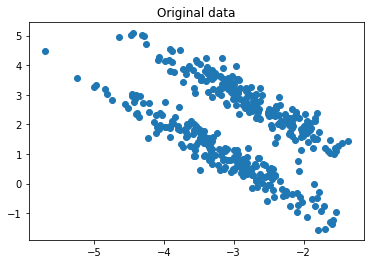

Text(0.5,1,'Data organized')

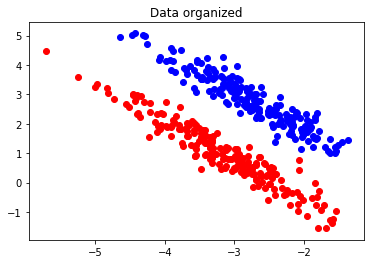

In [31]:
#original data
plt.scatter(X[:,0],X[:,1])
plt.title('Original data')
plt.show()
#eigvector
X1 = X[np.where(sec_small<0)]
X2 = X[np.where(sec_small>0)]

plt.scatter(X1[:,0],X1[:,1],c='b')
plt.scatter(X2[:,0],X2[:,1],c='r')
plt.title('Data organized')

Text(0.5,1,'Elements of second smallest eigenvector aranged by size')

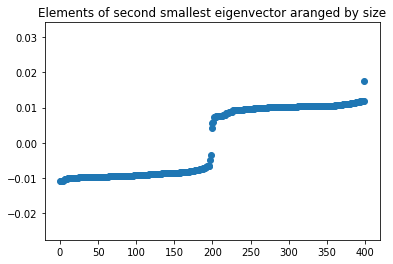

In [32]:
#graph of the elements of the second-smallest eigenvector (in ascending order)
plt.scatter(np.arange(n),sec_small[sec_small.argsort()])
plt.title('Elements of second smallest eigenvector aranged by size')

**(b)**

C:\Users\snati\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


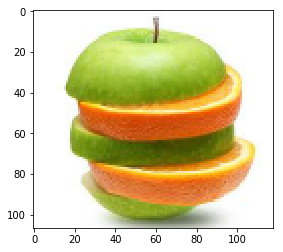

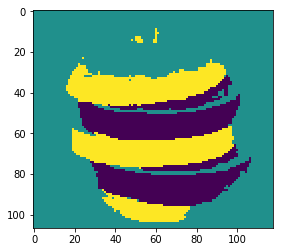

In [468]:
from skimage import data
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def ncut(X,k,gamma):
    n,p = X.shape
    gamma=1
    W = np.exp(-gamma*distance.cdist(X, X, 'euclidean')**2)
    d = np.zeros(n)
    for i in range(n):
        d[i] = np.sum(W[i,:])
    D = np.eye(n)*d
    L=D-W
    lam, u = eigh(L, D, eigvals_only=False,eigvals=(1,k+1))
    return(lam,u)

k=3
gamma=0.2
A = imread('fruit.jpg')
n,p,tmp = A.shape #Upphafleg stærð myndar
A = skimage.transform.resize(A,(int(n/2),int(p/2)))#minnkum myndina
n,p,tmp=A.shape
plt.imshow(A)
plt.show()



A_rgb = A.reshape(A.shape[0]*A.shape[1],3)#rgb transform
lam, u = ncut(A_rgb,k,gamma)
#K-means flokkun
A_km = KMeans(n_clusters=k)
A_km.fit(u)

clusters = A_km.cluster_centers_ #Litir í rgb
labels = A_km.labels_  #vigur
labels = labels.reshape(n,p); #n X p fylki með labels


plt.imshow(labels)


Ég ákvað út frá upphaflegu myndinni að hafa $k=3$ sem sagt flokkarnir appelsína, epli og bakgrunnur. Með góðu gildi á $\gamma$ fæst síðan ágætis skipting á myndinni. Það má líklega fínstilla $\gamma$ svo toppurinn á eplinu flokkist ekki í bakgrunninn.

C:\Users\snati\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


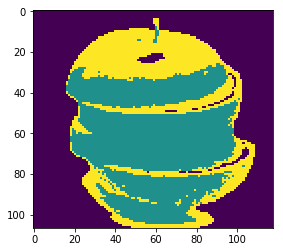

In [39]:
#notum K-means á upprunalegu myndina og sleppum öllu með eiginvigrum
import skimage
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k=3
A = imread('fruit.jpg')
n,p,tmp = A.shape #Upphafleg stærð myndar
A = skimage.transform.resize(A,(int(n/2),int(p/2)))#minnkum myndina
n,p,tmp=A.shape
A_rgb = A.reshape(A.shape[0]*A.shape[1],3)#rgb transform

#K-means flokkun
A_km2 = KMeans(n_clusters=k)
A_km2.fit(A_rgb)

clusters2 = A_km2.cluster_centers_ #Litir í rgb
labels2 = A_km2.labels_  #vigur
labels2 = labels2.reshape(n,p); #n X p fylki með labels


plt.imshow(labels2)


Fáum ekki nálægt því jafn góða skiptingu og í úrvinnslunni hér á undan.(Ef takmarkið er að flokka epli frá appelsínum)